In [1]:
!pip install nltk
!pip install kkltk
!pip install textblob
!pip install autocorrect

In [8]:
import csv
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from kkltk.kin_kir_stopwords import stopwords

# Kinyarwanda
kinyStopWords = stopwords.words('kinyarwanda')

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
tb = Blobber(analyzer=NaiveBayesAnalyzer())
from autocorrect import Speller


# englishStopWords = stopwords.words('english')

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

KINY_CONT = {
    "b'": "ba",
    "bw'": "bwa",
    "k'": "ku",
    "kw'": "kwa",
    "m'": "mu",
    "n'": "na",
    "w'": "wa",
    "y'": "ya",
    "z'": "za"
}

# Normalization: Basically removing unicode characters, URLS and email structures.
def normalize(row):
    row[1] = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", row[1])
    row[2] = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http", "", row[2])

# Removing wenglish words from Kinyarwanda
def removeWords(s):
    result = []
    sentence = s.split()
    for word in sentence:
      if not wordnet.synsets(word):
        result.append(word)
    ret = ' '.join(map(str, result))
    return ret

# Contraction: Removing all nouns that can be mean the same with apostrophe and without it
def englishContraction(eng):
    result = []
    eng = eng.lower().split()
    for t in eng:
        if "'" in t:
            if t in CONTRACTION_MAP:
                result.append(CONTRACTION_MAP[t])
            if t.endswith("'s"):
                result.append(t[:-2] + " is")
        else:
            result.append(t);
    ret = ' '.join(map(str, result))
    return ret

def kinyContraction(kin):
    result = []
    kin = kin.lower().split()
    for t in kin:
        if "'" in t:
            if t in KINY_CONT:
                result.append(KINY_CONT[t])
        else:
            result.append(t);
    ret = ' '.join(map(str, result))
    return ret

def removeKinyStopWords(sentence):
    tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in tokens if w not in kinyStopWords]
    filtered_sentence = []
    for w in tokens:
        if w not in kinyStopWords:
            filtered_sentence.append(w)
    ret = ' '.join(map(str, filtered_sentence))
    return ret

# def removeEnglishStopWords(sentence):
#     tokens = word_tokenize(sentence)
#     # print(englishStopWords)
#     filtered = [w for w in tokens if w not in englishStopWords]
#     filtered = []
#     for w in tokens:
#         if w not in englishStopWords:
#             filtered.append(w)
#     rett = ' '.join(map(str, filtered))
#     return rett

# Let's check words' spelling
def spellCheck(line):
    spell = Speller(lang='en')
    line = line.split()
    result = []
    for word in line:
        r = spell(word)
        result.append(r)
    ret = ' '.join(map(str, result))
    return ret


# Read: Helps us read data from the CSV file
def readData():
    rows = []
    with open('Eng_Kin-Paralleldata.csv', 'r') as file_obj:
        reader_obj = csv.reader(file_obj) 
        for row in reader_obj:
            row[1] = englishContraction(row[1])
            row[2] = kinyContraction(row[2])
            normalize(row)
            row[2] = removeWords(row[2])
            # row[1] = removeEnglishStopWords(row[1])
            row[2] = removeKinyStopWords(row[2])
            # # row[1] = spellCheck(row[1])
            rows.append(row)
    return rows
  
# Generate: Generate new CSV file which contains cleaned data
def newCSVGenerate():
    with open('csv.csv', 'w', newline='') as new_obj:
        ob = csv.writer(new_obj)
        ob.writerows(readData())

print("Started the job!")

# Calling the function to generate the CSV file. It will call on all other functions
newCSVGenerate()

print('Job done!')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CISHAHAYO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CISHAHAYO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Started the job!
Job done!


# **GIZ Kinyarwanda data text cleaning Hackathon**

In this challenge, we were tasked with uncovering and remediating issues in the provided parallel corpus consisting of English-Kinyarwanda sentence pairs. The cleaned dataset will later be used to build high-quality machine translation models.

We had 20K+ Kinyarwanda-English parallel sentences to clean

**Step 1**: We first had a csv file of the dataset posted on Zindi. We downloaded it and then imported the csv plugin in vs code(the code editor we used.)

**Step 2:** We created function to read the csv data that would also call the functions we created for each technique we used to clean data.
(picture 0)
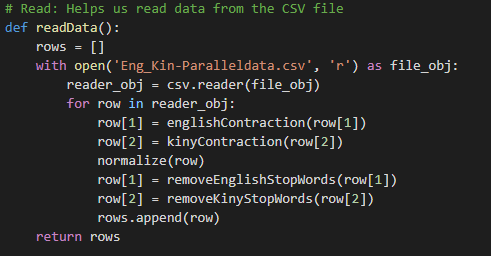

**Step 3**: We applied the contractions removal technique on both english and Kinyarwanda. Nouns that had an apostrophe were stretched and english contractions as well. 
We made a function that would have an iteration going through every word tho check the contractions and stretch them. We had a list of english contractions to check against and we also made a kinyarwanda contraction list for kinyarwandan sentence too.
(Picture 1)
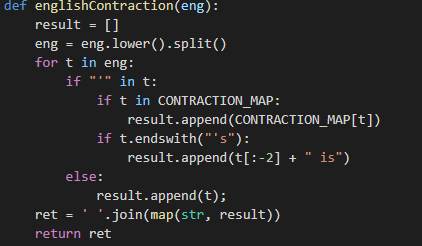

**Step 4:** We then normalized the parallel sentences, removing the uppercase, URLs, email ids, tags and Uinicode characters.
(Picture 2)

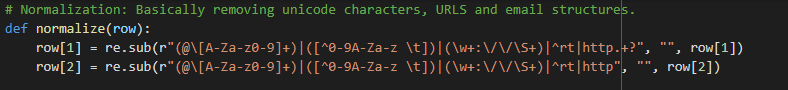

**Step 5:** Some sentences in Kinyarwanda language had the opposite language in them. We had to remove foreign language from the original language translated. We also used the NLTK library to check all the english words found in the sentence matching those it already have in it's library and retain them. Unfortunately since, NLTK is somehow a growing library and not every single english word is not found there, we then applied the stopwords technique after this technique to remove the remaining foreign words.


**Step 6:** Stopwords had to be removed. We used NLTK library to check against english sentences and used KKLTK library to check against Kinyarwanda sentences.
(Picture 3)

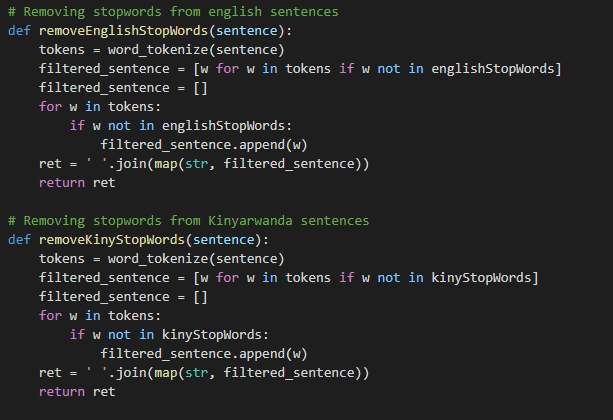

**Step 7:** We had to use a library to check the spelling of english words, for them to be written in a correct form. We used teh Autocorrect libary which would check the english words and coorect them.
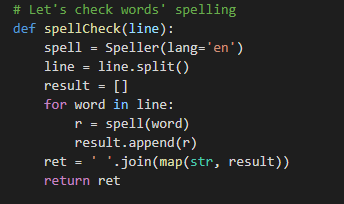

Here is the list of libraries we imported
(Picture 5)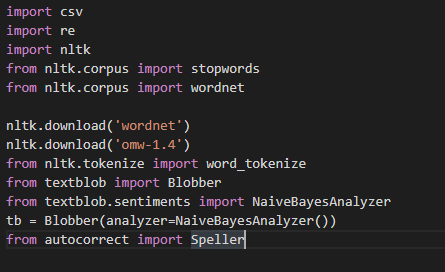

